In [1]:
import matplotlib.pyplot as plt 
from astropy import units as u
from astropy.io import fits
import numpy as np 
from reproject import reproject_interp
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import simple_norm

In [2]:
directory = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/USNOA2-1125-19940303/"
cube='arp86-3_cube1.fits'

In [3]:
# import data of BBarolo model 
# get the header 
header = fits.getheader(directory+cube)
data = fits.getdata(directory+cube)
#data moment0
data_mom0 = fits.getdata(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
header_mom0 = fits.getheader(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
#data moment1
data_mom1 = fits.getdata(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")
#data moment2
data_mom2 = fits.getdata(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_2mom.fits")
#data model
data_model = fits.getdata(directory+"output/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_azim.fits")
#moment 0 of the model
data_model_mom0 = fits.getdata(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_0mom_azim.fits")
#moment 1 of the model
data_model_mom1 = fits.getdata(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_1mom_azim.fits")
#moment 2 of the model
data_model_mom2 = fits.getdata(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_2mom_azim.fits")

In [4]:
# upload the optical image 
optical_file = "arp86-3-optical.fits"
header_optical  = fits.getheader(directory+optical_file)
data_optical = fits.getdata(directory+optical_file)

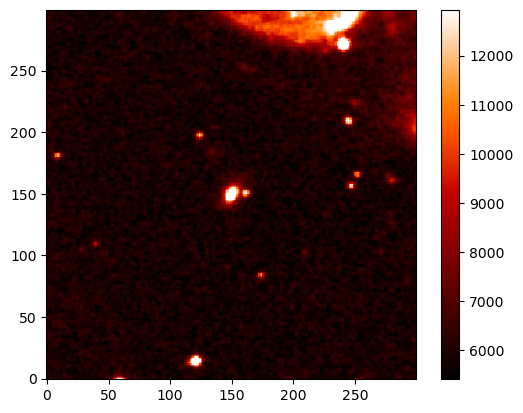

In [5]:
vmin, vmax = np.percentile(data_optical, [1, 99.5])
plt.imshow(data_optical, cmap='gist_heat', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar()
plt.show()

### Reproject the HI image into the same pixel grid as the optical image

In [6]:
hdul_mom0 = fits.open(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
hi_reprojected_0,footprint = reproject_interp(hdul_mom0,header_optical)
rms_mom0 = np.sqrt(np.nanmean(hi_reprojected_0**2))

In [7]:
print(rms_mom0)
print(np.nanmin(hi_reprojected_0),np.nanmax(hi_reprojected_0))

0.13135624773982071
0.02479764260351658 0.27314162254333496


In [8]:
np.linspace(2 * rms_mom0, np.nanmax(hi_reprojected_0), 40)

array([0.2627125 , 0.26297991, 0.26324732, 0.26351474, 0.26378215,
       0.26404956, 0.26431698, 0.26458439, 0.2648518 , 0.26511922,
       0.26538663, 0.26565404, 0.26592146, 0.26618887, 0.26645628,
       0.2667237 , 0.26699111, 0.26725853, 0.26752594, 0.26779335,
       0.26806077, 0.26832818, 0.26859559, 0.26886301, 0.26913042,
       0.26939783, 0.26966525, 0.26993266, 0.27020007, 0.27046749,
       0.2707349 , 0.27100231, 0.27126973, 0.27153714, 0.27180455,
       0.27207197, 0.27233938, 0.2726068 , 0.27287421, 0.27314162])

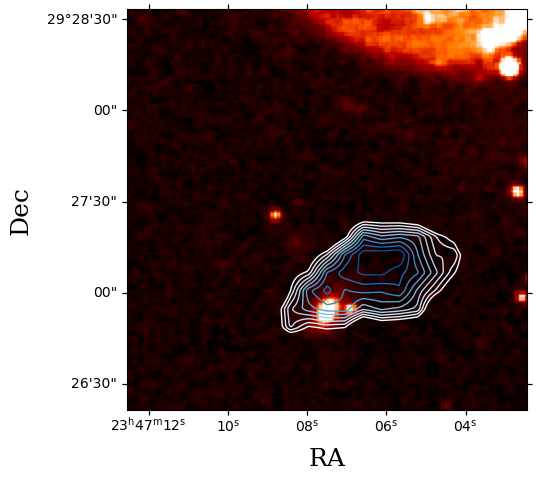

In [9]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Background: Optical image
cb = ax.imshow(
    data_optical,
    cmap='gist_heat',  
    origin='lower',
    vmin=vmin, vmax=vmax,
)

# Contour levels from 2σ to max
levels = np.linspace(1.2 * rms_mom0, np.nanmax(hi_reprojected_0), 10)

# Contour overlay in white or cyan for visibility
ax.contour(
    hi_reprojected_0,
    levels=levels,
    cmap='Blues', 
    linewidths=1,
)

ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(50, 250)
plt.ylim(100, 300)


plt.tight_layout()
plt.savefig('arp86-3-mom0-optical.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# compute the reprojection for moment 1 
hdulmom1 = fits.open(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")
hi_mom1_rep, foot_mom1=reproject_interp(hdulmom1,header_optical)
rms_mom1=(np.sqrt(np.nanmean(hi_mom1_rep**2)))

In [11]:
print(np.nanmin(hi_mom1_rep),np.nanmax(hi_mom1_rep))
print(rms_mom1)

4904.6552734375 5028.32421875
4955.286554591763


In [12]:
np.arange(np.nanmin(hi_mom1_rep),np.nanmax(hi_mom1_rep),20)

array([4904.65527344, 4924.65527344, 4944.65527344, 4964.65527344,
       4984.65527344, 5004.65527344, 5024.65527344])

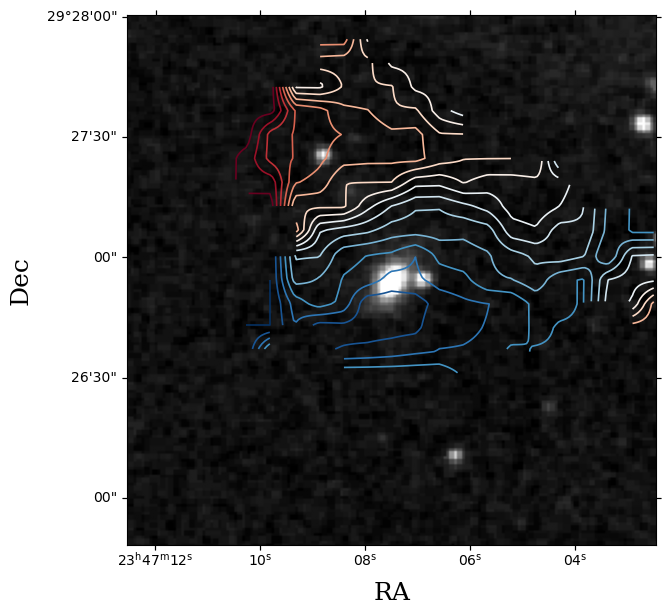

In [13]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Use log stretch for better contrast in faint structures
norm = simple_norm(data_optical, 'log', percent=99.5)
ax.imshow(data_optical, cmap='gist_gray', vmin=vmin,vmax=vmax, origin='lower')

# Velocity field (moment 1) contours: reversed RdBu, centered around systemic velocity
# Adjust levels if needed based on your specific velocity range
vel_min, vel_max = np.nanmin(hi_mom1_rep), np.nanmax(hi_mom1_rep)  # You can automate this with np.nanmin/max if desired
levels = np.arange(vel_min, vel_max, 8)
cont = ax.contour(hi_mom1_rep, levels=levels, cmap='RdBu_r', linewidths=1.2)

# Add a colorbar for the moment 1 contours (velocity field)
# label the contour, this is optional
#ax.clabel(cont, inline=True, fmt='%d km/s', fontsize=10)

ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(50, 250)
plt.ylim(50, 250)
# save figure 
# plt.savefig('velocity_overlay.svg', dpi=300)

plt.tight_layout()
plt.savefig('arp86-3-mom1-optical.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
hdulmom2 = fits.open(directory+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_2mom.fits")
hi_mom2_rep, foot_mom2=reproject_interp(hdulmom2,header_optical)
rms_mom2=(np.sqrt(np.nanmean(hi_mom2_rep**2)))

In [15]:
print(rms_mom2)
print(np.nanmin(hi_mom2_rep),np.nanmax(hi_mom2_rep))

23.194125558506695
4.599415660777595e-06 42.486759185791016


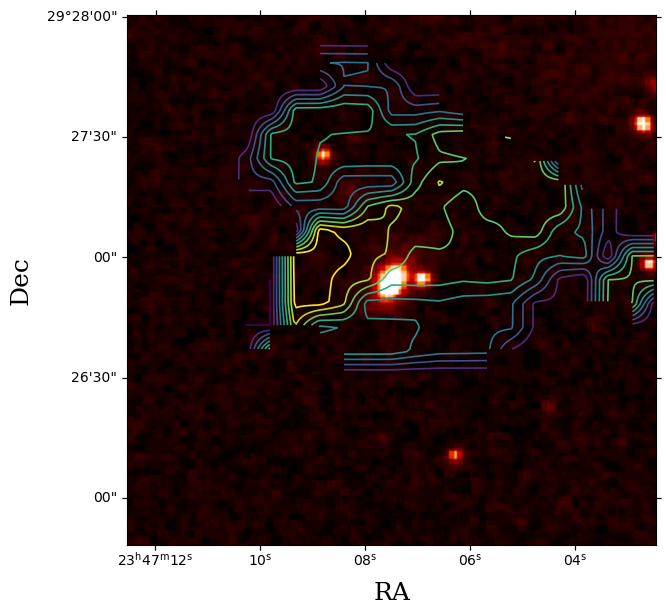

In [16]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Improve optical background contrast
norm = simple_norm(data_optical, 'log', percent=99.5)
ax.imshow(data_optical, cmap='gist_heat', vmin=vmin,vmax=vmax, origin='lower')

# Contours for moment 2 (velocity dispersion)
disp_min, disp_max = np.nanmin(hi_mom2_rep),np.nanmax(hi_mom2_rep)  # in km/s (check your units)
levels = np.arange(disp_min, disp_max, 5)
cont = ax.contour(hi_mom2_rep, levels=levels, cmap='viridis', linewidths=1.2)

# Label the contours
#ax.clabel(cont, inline=True, fmt='%d km/s', fontsize=10)

# Axis formatting
ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(50, 250)
plt.ylim(50, 250)

# plt.savefig('moment2_overlay.svg', dpi=300)

plt.tight_layout()
plt.savefig('arp86-3-mom2-optical.png', dpi=300,bbox_inches='tight')
plt.show()

## Residuals

In [17]:
data_mom0.shape

(104, 107)

In [18]:
residual_mom0 = data_mom0 -data_model_mom0
residual_mom1 = data_mom1 -data_model_mom1
residual_mom2 = data_mom2 -data_model_mom2

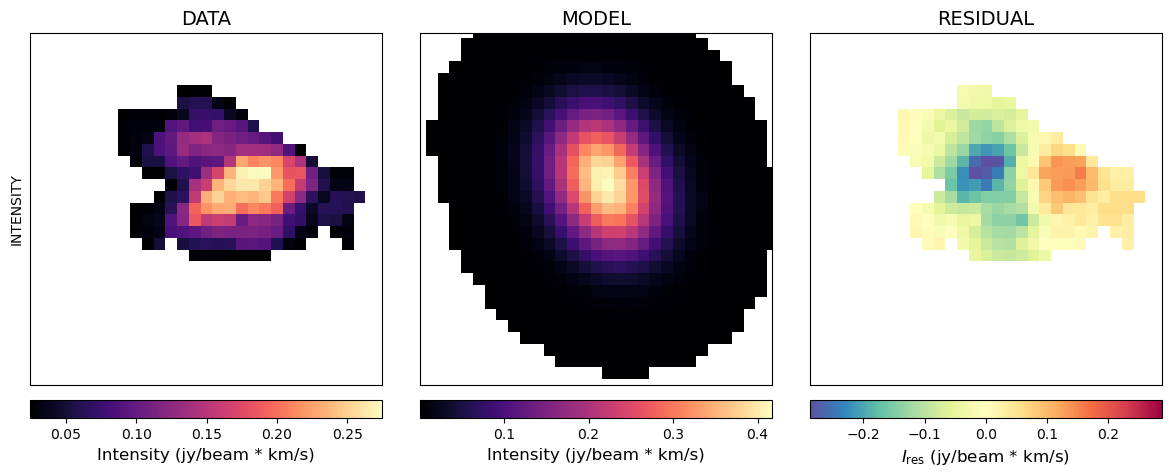

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})  # tighter spacing

# Common image kwargs
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: DATA ----------
im1 = axs[0].imshow(data_mom0, cmap='magma', **common_kwargs)
axs[0].set_title('DATA', fontsize=14)
axs[0].set_ylabel('INTENSITY')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[0].set_xlim(25, 55)
axs[0].set_ylim(20, 50)

# Add shared colorbar below first two panels
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Intensity (jy/beam * km/s)', fontsize=12)

# ---------- Panel 2: MODEL ----------
im2 = axs[1].imshow(data_model_mom0, cmap='magma', **common_kwargs)
axs[1].set_title('MODEL', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[1].set_xlim(25, 55)
axs[1].set_ylim(20, 50)

# Share colorbar with first panel
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Intensity (jy/beam * km/s)', fontsize=12)

# ---------- Panel 3: RESIDUAL ----------
resid_abs_max = np.nanmax(np.abs(residual_mom0))
im3 = axs[2].imshow(residual_mom0, cmap='Spectral_r', vmin=-resid_abs_max, vmax=resid_abs_max, **common_kwargs)
axs[2].set_title('RESIDUAL', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[2].set_xlim(25, 55)
axs[2].set_ylim(20, 50)

# Separate colorbar for residuals
divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')   
cbar3.set_label(r'$I_{\mathrm{res}}$ (jy/beam * km/s)', fontsize=12)

# Equal aspect ratio for all panels
for ax in axs:
    ax.set_aspect('equal')

# Optional export
plt.savefig("moment0_panels_fixed.jpg", dpi=300, bbox_inches='tight')
# plt.savefig("moment0_model.eps",format="eps", dpi=300, bbox_inches='tight')
plt.show()


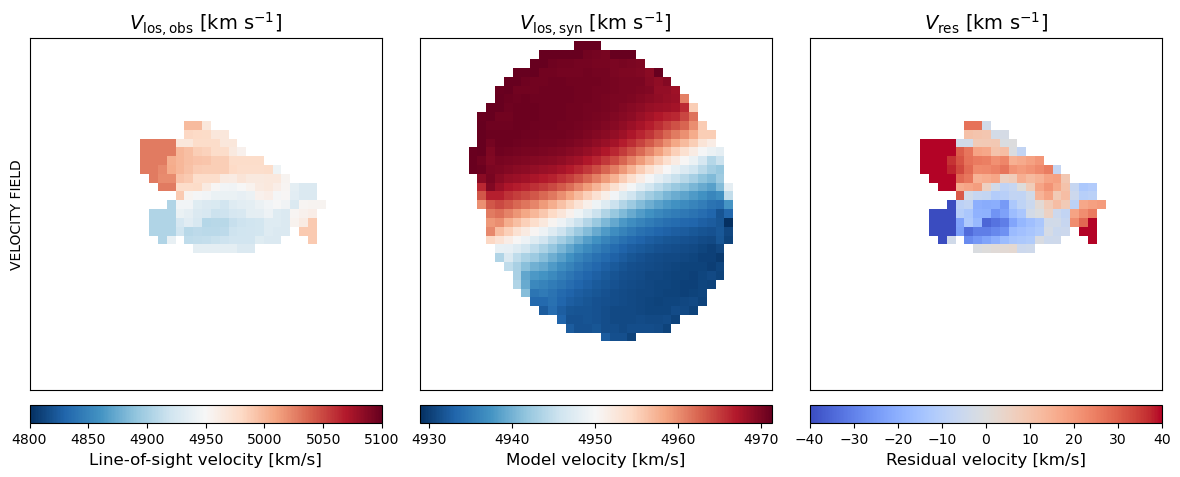

In [22]:
# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})

# Shared image display settings
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: Observed velocity ----------
im1 = axs[0].imshow(data_mom1, cmap='RdBu_r', vmin=4800, vmax=5100, **common_kwargs)
axs[0].set_title(r'$V_{\mathrm{los,obs}}$ [km s$^{-1}$]', fontsize=14)
axs[0].set_ylabel('VELOCITY FIELD')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[0].set_xlim(20, 60)
axs[0].set_ylim(15, 55)

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Line-of-sight velocity [km/s]', fontsize=12)

# ---------- Panel 2: Model velocity ----------
im2 = axs[1].imshow(data_model_mom1, cmap='RdBu_r', **common_kwargs)
axs[1].set_title(r'$V_{\mathrm{los,syn}}$ [km s$^{-1}$]', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[1].set_xlim(20, 60)
axs[1].set_ylim(15, 55)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Model velocity [km/s]', fontsize=12)

# ---------- Panel 3: Residual velocity ----------
resid_vlim = 40  # km/s
im3 = axs[2].imshow(residual_mom1, cmap='coolwarm', vmin=-resid_vlim, vmax=resid_vlim, **common_kwargs)
axs[2].set_title(r'$V_{\mathrm{res}}$ [km s$^{-1}$]', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[2].set_xlim(20, 60)
axs[2].set_ylim(15, 55)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')
cbar3.set_label(r'Residual velocity [km/s]', fontsize=12)

# Format all panels
for ax in axs:
    ax.set_aspect('equal')

# Optional: Export as publication-quality PDF
plt.savefig("moment1-2MArp3.png", dpi=300, bbox_inches='tight')
plt.show()

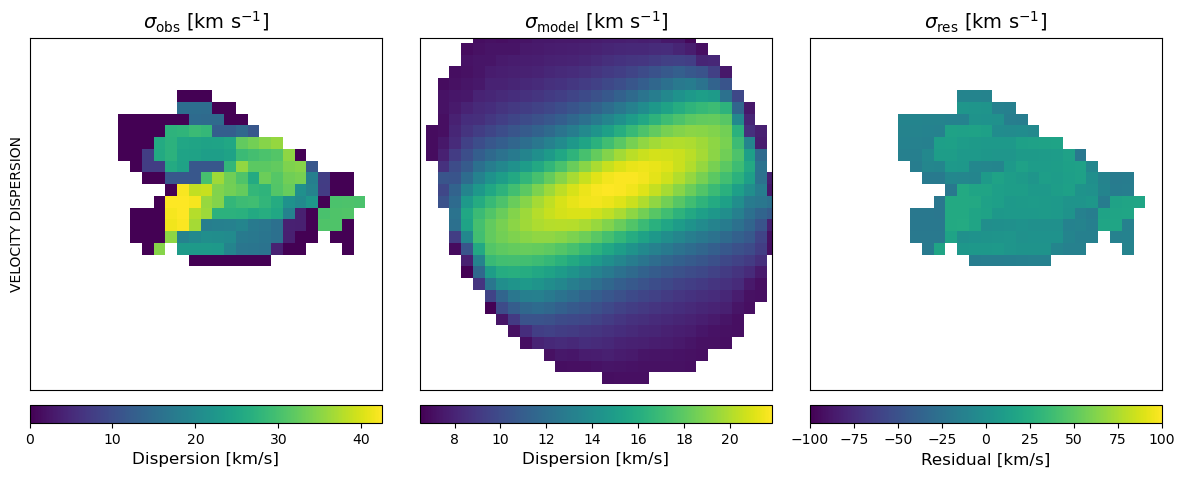

In [37]:
# Create figure and axes with tight spacing
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})

# Shared display settings
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: Observed dispersion ----------
vmin_m2 = 0
vmax_m2 = np.nanpercentile(data_mom2, 99.5)
im1 = axs[0].imshow(data_mom2, cmap='viridis', vmin=vmin_m2, vmax=vmax_m2, **common_kwargs)
axs[0].set_title(r'$\sigma_{\mathrm{obs}}$ [km s$^{-1}$]', fontsize=14)
axs[0].set_ylabel('VELOCITY DISPERSION')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[0].set_xlim(25, 55)
axs[0].set_ylim(20, 50)

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Dispersion [km/s]', fontsize=12)

# ---------- Panel 2: Model dispersion ----------
im2 = axs[1].imshow(data_model_mom2, cmap='viridis', **common_kwargs)
axs[1].set_title(r'$\sigma_{\mathrm{model}}$ [km s$^{-1}$]', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[1].set_xlim(25, 55)
axs[1].set_ylim(20, 50)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Dispersion [km/s]', fontsize=12)

# ---------- Panel 3: Residual dispersion ----------
resid_lim = 100  # km/s
im3 = axs[2].imshow(residual_mom2, cmap='viridis', vmin=-resid_lim, vmax=resid_lim, **common_kwargs)
axs[2].set_title(r'$\sigma_{\mathrm{res}}$ [km s$^{-1}$]', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
axs[2].set_xlim(25, 55)
axs[2].set_ylim(20, 50)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')
cbar3.set_label('Residual [km/s]', fontsize=12)

# Consistent appearance
for ax in axs:
    ax.set_aspect('equal')

# Optional: Export figure
# plt.savefig("moment2_threepanel_dispersion.pdf", dpi=300, bbox_inches='tight')
plt.show()


# Residual of the gas

In [38]:
# import mask 
mask = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_mask_kms.fits")
data_new_galaxy = data - data_model

# create a trehsold to mask the noise
rms_data=np.sqrt(np.nanmean(data_new_galaxy**2))
#data_new_galaxy_masked = np.where(data_new_galaxy > 2*rms_data, data_new_galaxy, 0)
data_new_galaxy_masked = np.where(mask,data_new_galaxy,0)
hdul_res_gas = fits.PrimaryHDU(data - data_model , header=header)
hdul_res_gas.writeto(directory+'residual_gas_cube.fits',overwrite=True)


In [39]:

mom0_dat_new = np.nansum(data_new_galaxy_masked,axis=0)*abs(header['CDELT3'])/1000


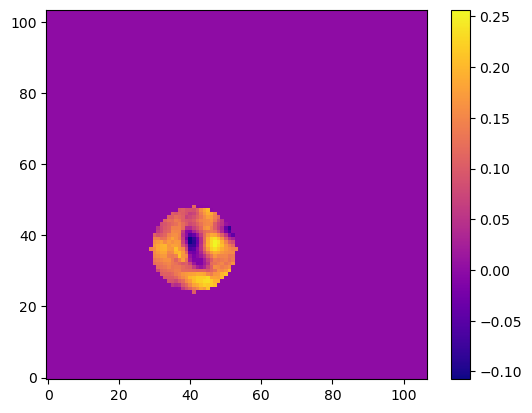

In [40]:
plt.imshow(mom0_dat_new, cmap='plasma', origin='lower')
plt.colorbar()
plt.show()

In [41]:
directory_new = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/ARP86/Arp86-Galaxy-System/Residuals/"
hdul_new = fits.PrimaryHDU(data_new_galaxy,header=header)
hdul_new.writeto(directory_new + 'residual_Arp3.fits', overwrite=True)

In [25]:
def compute_moment1(data,header,mom0data):
    d_1_av=np.nansum(data[:,:,:],axis=1)
    d_av=np.nansum(d_1_av[:,:],axis=1)
    spectra=d_av[:-3]
    x_axis=(np.arange(0,len(spectra))*header['CDELT3']+(header['CRVAL3']-header['CRPIX3']*header['CDELT3']))/1000
    d_for_mom1=data.copy()
    for i in range(len(x_axis)):
        d_for_mom1[i,:,:] = x_axis[i]*d_for_mom1[i,:,:]
    d_mom1=np.nansum(d_for_mom1,axis=0)*abs(header['CDELT3'])/(mom0data*1000)
    return d_mom1

In [26]:
computed_mom1_dat=compute_moment1(data_new_galaxy_masked,header,mom0_dat_new)

/tmp/ipykernel_8761/2219311961.py:9: RuntimeWarning: invalid value encountered in divide
  d_mom1=np.nansum(d_for_mom1,axis=0)*abs(header['CDELT3'])/(mom0data*1000)


In [27]:
print(np.nanmin(computed_mom1_dat),np.nanmax(computed_mom1_dat))

-1719.6521 9918.038


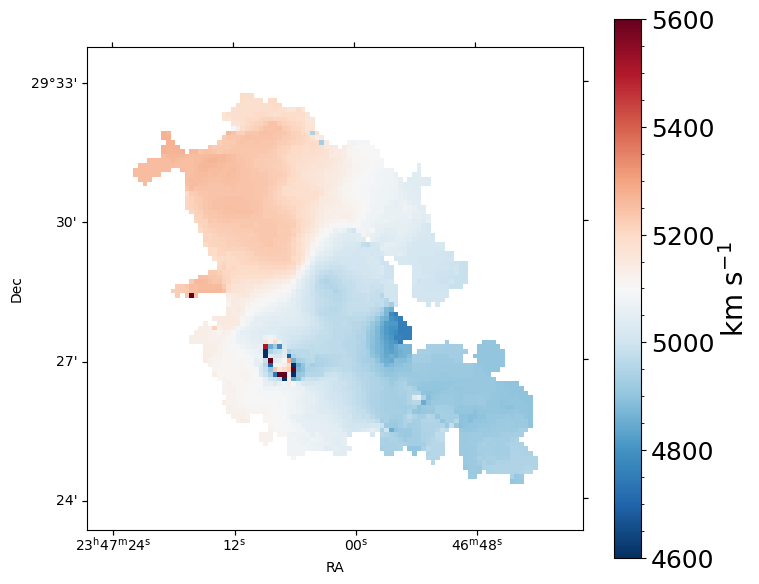

In [28]:
fig = plt.figure(figsize= (8,7))
ax=fig.add_subplot(1,1,1,projection=(WCS(header_mom0)))
cb=plt.imshow(computed_mom1_dat,cmap='RdBu_r',vmin=4600,vmax=5600,origin='lower')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
cbar=fig.colorbar(cb)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel(r'km s$^{-1}$',fontsize=20)
plt.show()

In [29]:
# saving the data in a afits file
def save_data(h_1,moment,data_mom):
    '''
    -h_1 is the header of the original data cube
    -moment is the name of the  map, this will be used to give the name for the fits file
    -data_mom is the data of the moment map
    '''
    wcs_new = WCS(naxis=2)
    wcs_new.wcs.cdelt = [h_1['CDELT1'], h_1['CDELT2']]
    wcs_new.wcs.ctype = [h_1['CTYPE1'], h_1['CTYPE2']]
    wcs_new.wcs.crval = [h_1['CRVAL1'], h_1['CRVAL2']]
    wcs_new.wcs.crpix = [h_1['CRPIX1'], h_1['CRPIX2']]
    header = wcs_new.to_header()        
    
# add the data and the header to an object that can be written into a file 
    hdul_new = fits.PrimaryHDU(data_mom, header=header) 
    hdul_new.writeto(directory+'{}_.fits'.format(f'res_gas_{moment}'),overwrite=True)

In [30]:
save_data(header,'mom1',computed_mom1_dat)


In [31]:

hdul_res_gas = fits.open(directory+'{}_.fits'.format(f'res_gas_mom1'))

In [32]:
# compute the reprojection 
hi_mom1_rep_res, foot_mom1_res=reproject_interp(hdul_res_gas,header_optical)
rms_mom1=(np.sqrt(np.nanmean(hi_mom1_rep_res**2)))

In [33]:
print(np.nanmin(hi_mom1_rep_res),np.nanmax(hi_mom1_rep_res))
print(rms_mom1)

-1312.24267578125 9645.7626953125
5045.2141407389045


In [34]:
data_optical_ngc7753 = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/ngc7753-optical.fits")
header_optical_ngc7753  = fits.getheader("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/ngc7753-optical.fits")

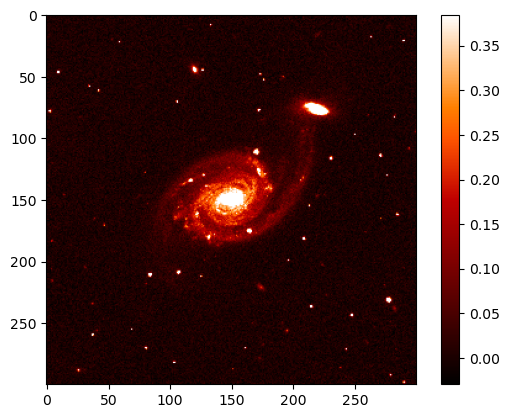

In [35]:
vmin, vmax = np.percentile(data_optical_ngc7753, [1, 99.5])
plt.imshow(data_optical_ngc7753, cmap='gist_heat', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.show()

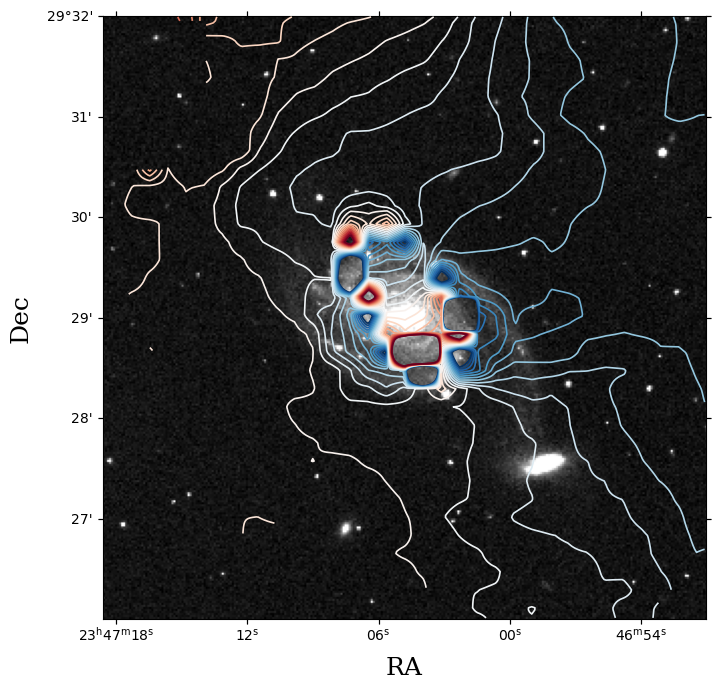

In [36]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical_ngc7753))

# Use log stretch for better contrast in faint structures
norm = simple_norm(data_optical_ngc7753, 'log', percent=99.5)
ax.imshow(data_optical_ngc7753, cmap='gist_gray', vmin=vmin,vmax=vmax, origin='lower')

# Velocity field (moment 1) contours: reversed RdBu, centered around systemic velocity
# Adjust levels if needed based on your specific velocity range
vel_min, vel_max = 4800, 5400  # You can automate this with np.nanmin/max if desired
levels = np.arange(vel_min, vel_max, 25)
cont = ax.contour(hi_mom1_rep_res, levels=levels, cmap='RdBu_r', linewidths=1.2)

# Add a colorbar for the moment 1 contours (velocity field)
# label the contour, this is optional
#ax.clabel(cont, inline=True, fmt='%d km/s', fontsize=10)

ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# save figure 
# plt.savefig('velocity_overlay.svg', dpi=300)

plt.tight_layout()
plt.show()